# 6.0 Unsupervised Learning

## K-Means Clustering

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


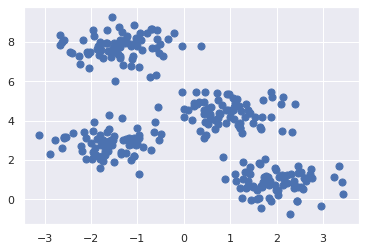

In [4]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [5]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

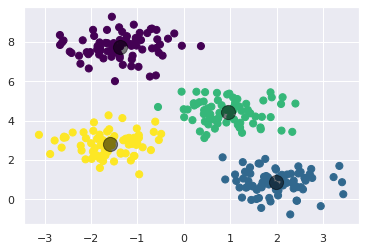

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

## Example:

In [7]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [8]:
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

In [9]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

In [10]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7952142459654981

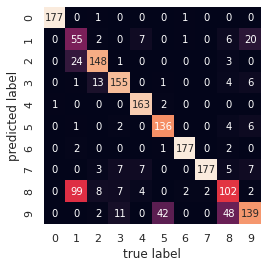

In [11]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

# Principal Component Analysis

In [12]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [13]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/'
                      'machine-learning-databases/wine/wine.data',
                      header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines', 'Proline']

df_wine.head()

X = df_wine.drop(['Class label'], axis=1).values
y = df_wine['Class label']

print(X.shape, y.shape)
print(y)

(178, 13) (178,)
0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Class label, Length: 178, dtype: int64


## Data Preprocessing

In [14]:
## Splitting the data into 70% training and 30% test subsets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Note:

Do train-test split before scaling!

### PCA

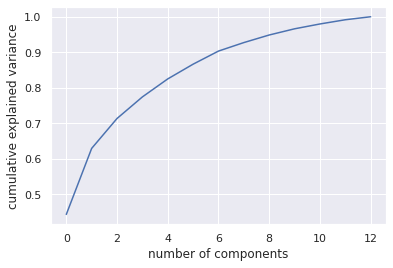

In [24]:
from sklearn.decomposition import PCA

pca = PCA().fit(X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

accum_explained_var = np.cumsum(pca.explained_variance_ratio_)

min_threshold = np.argmax(accum_explained_var>0.9) # use 80%

In [25]:
pca = PCA(n_components=min_threshold + 1)

X_train_projected= pca.fit_transform(X_train)

X_test_projected = pca.transform(X_test)

### Logistic Regression without PCA

In [26]:
# Train the model
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report

# Logistic Regression

# without reduction
logregwithoutpca = LogisticRegression()
logregwithoutpca.fit(X_train, y_train)

logregwithoutpca_result = logregwithoutpca.predict(X_test)

print('Accuracy of Logistic Regression (without PCA) on training set: {:.2f}'
     .format(logregwithoutpca.score(X_train, y_train)))
print('Accuracy of Logistic Regression (without PCA)  on testing set: {:.2f}'
     .format(logregwithoutpca.score(X_test, y_test)))
print('\nConfusion matrix :\n',confusion_matrix(y_test, logregwithoutpca_result))
print('\n\nClassification report :\n\n', classification_report(y_test, logregwithoutpca_result))

Accuracy of Logistic Regression (without PCA) on training set: 0.98
Accuracy of Logistic Regression (without PCA)  on testing set: 1.00

Confusion matrix :
 [[19  0  0]
 [ 0 22  0]
 [ 0  0 13]]


Classification report :

               precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        22
           3       1.00      1.00      1.00        13

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



### Logistic Regression with PCA

In [27]:
logregwithpca = LogisticRegression()
logregwithpca.fit(X_train_projected, y_train)

logregwithpca_result = logregwithpca.predict(X_test_projected)

print('Accuracy of  Logistic Regression (with PCA) on training set: {:.2f}'
     .format(logregwithpca.score(X_train_projected, y_train)))
print('Accuracy of Logistic Regression (with PCA) on testing set: {:.2f}'
     .format(logregwithpca.score(X_test_projected, y_test)))
print('\nConfusion matrix :\n',confusion_matrix(y_test, logregwithpca_result))
print('\n\nClassification report :\n\n', classification_report(y_test, logregwithpca_result))

Accuracy of  Logistic Regression (with PCA) on training set: 0.98
Accuracy of Logistic Regression (with PCA) on testing set: 1.00

Confusion matrix :
 [[19  0  0]
 [ 0 22  0]
 [ 0  0 13]]


Classification report :

               precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        22
           3       1.00      1.00      1.00        13

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54

